In [91]:
%load_ext autoreload
%autoreload 2


import json
import os
import matplotlib.pyplot as plt
import seaborn as sns

from ScheduleSampler import ScheduleSampler, activity_map, start_times

filter_num=0
idle_sampling_factor=1.1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


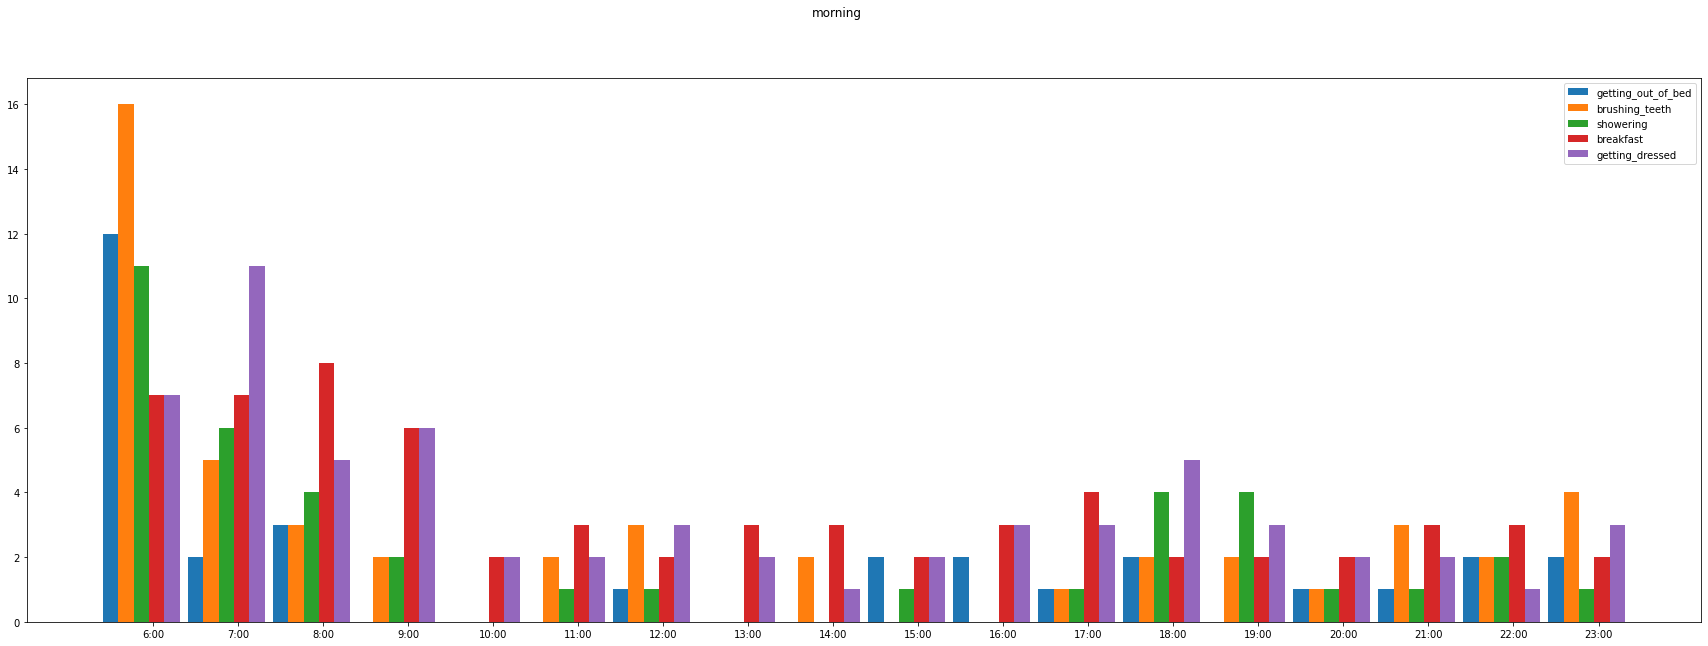

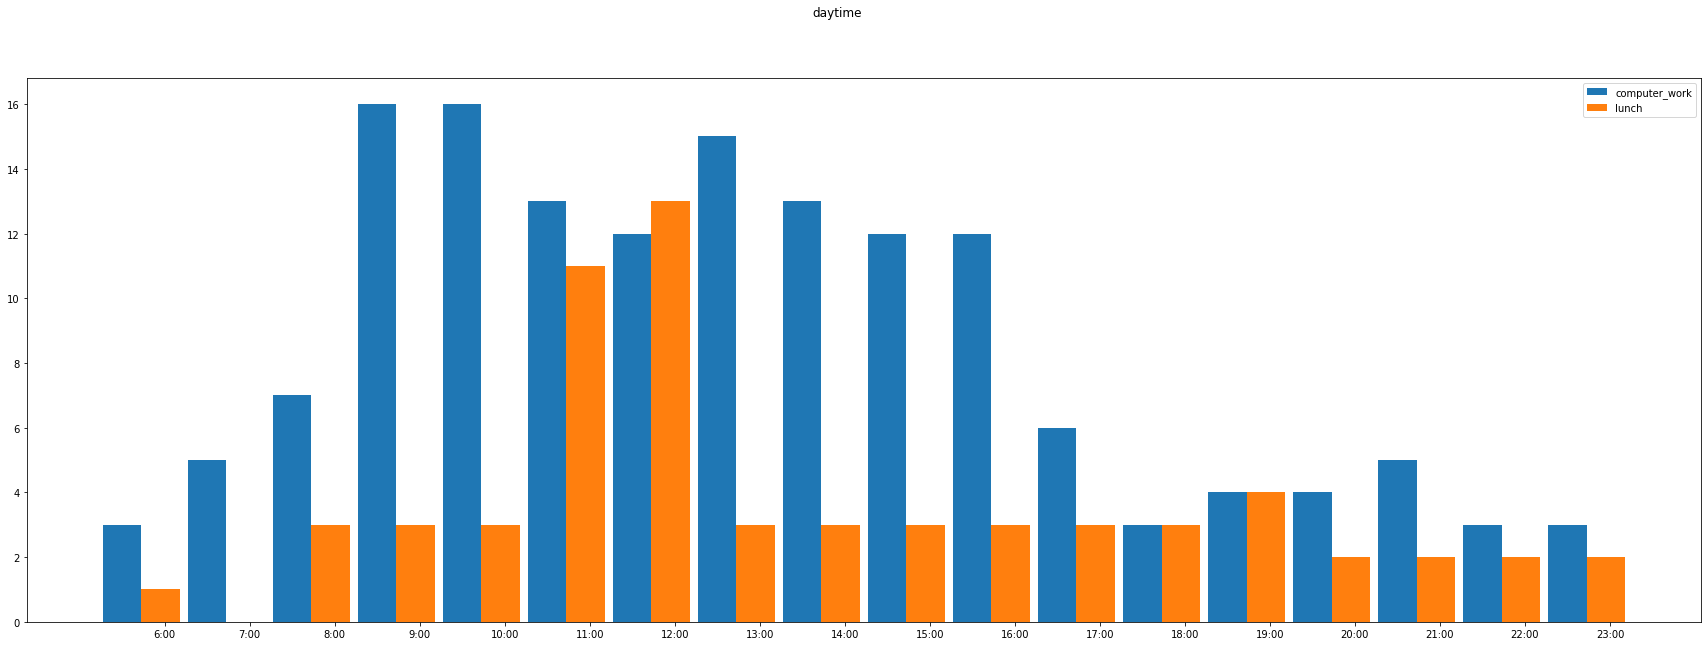

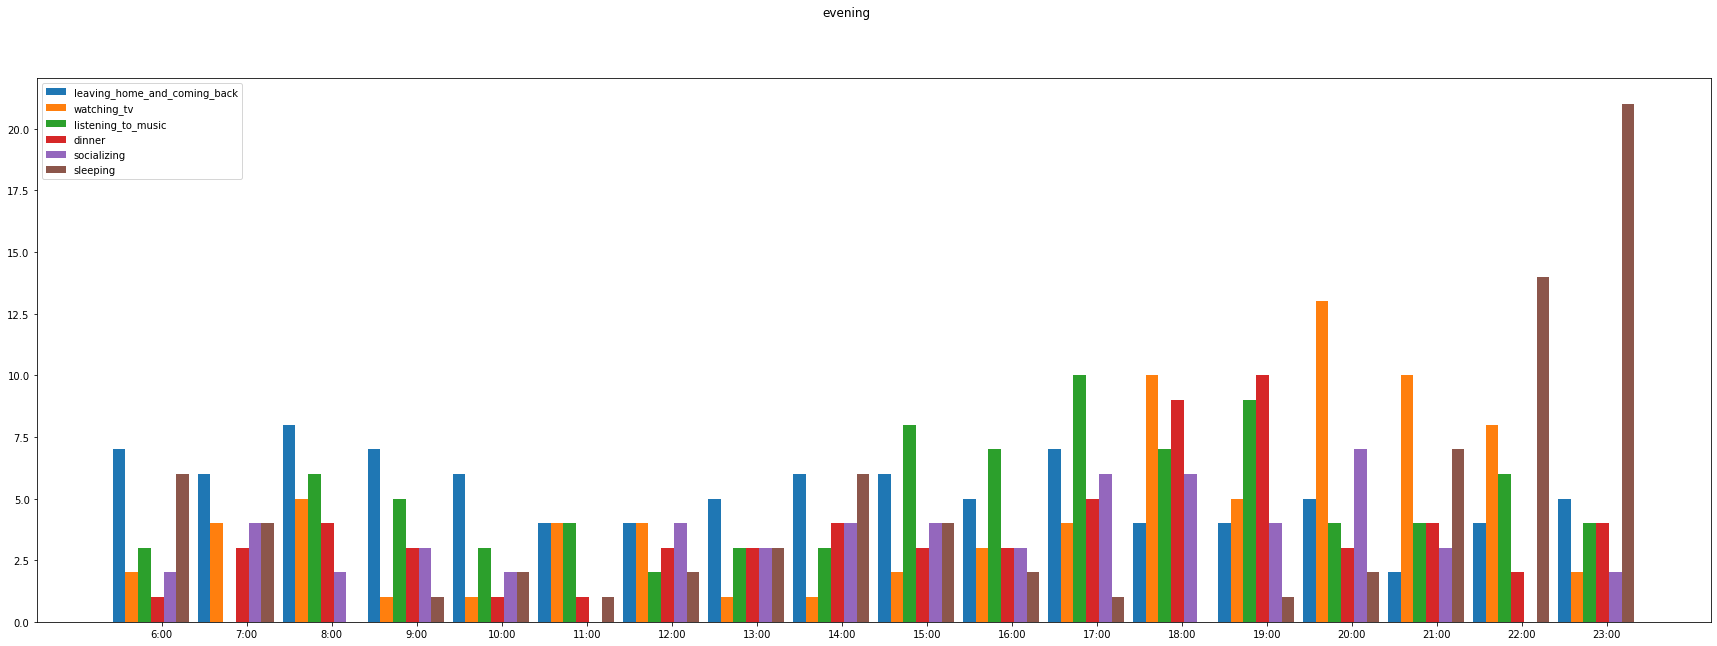

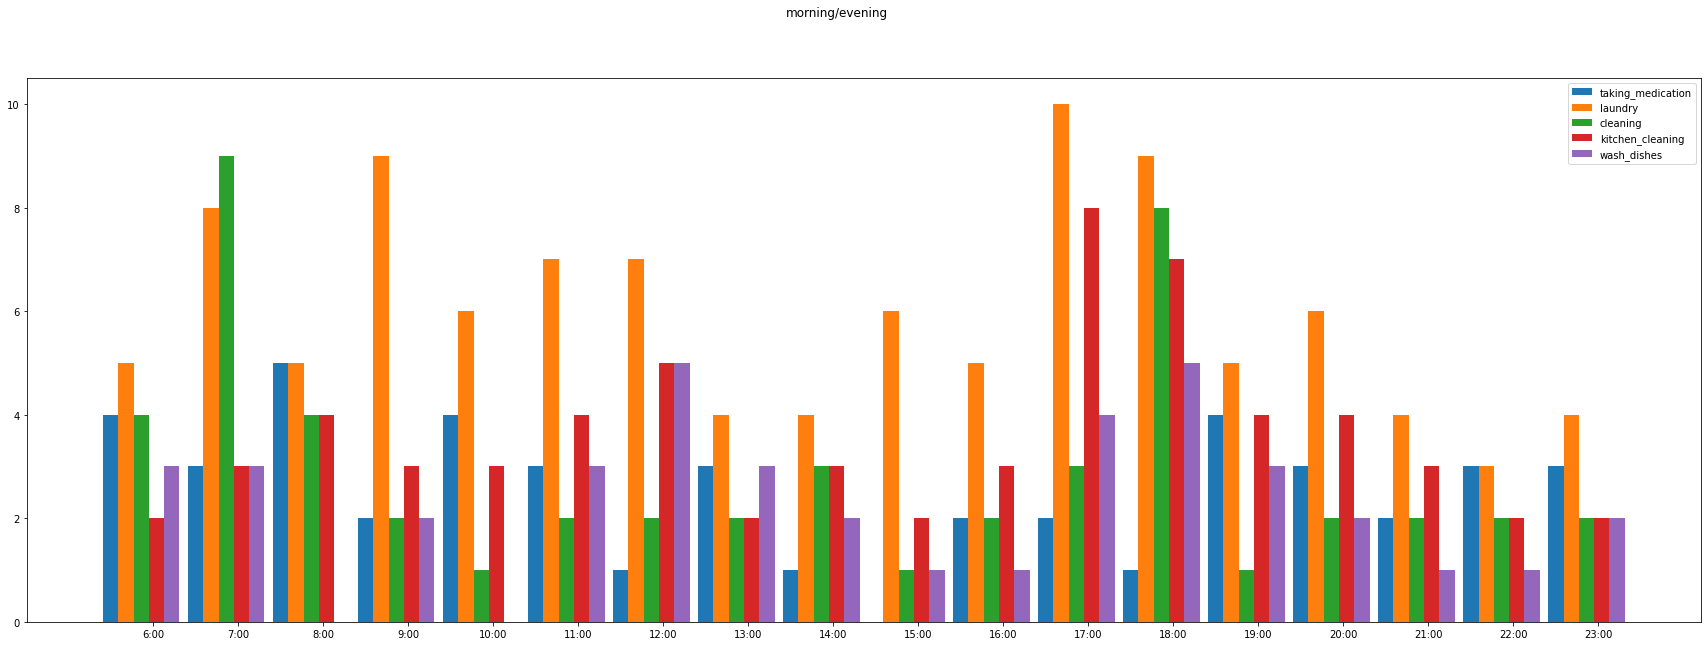

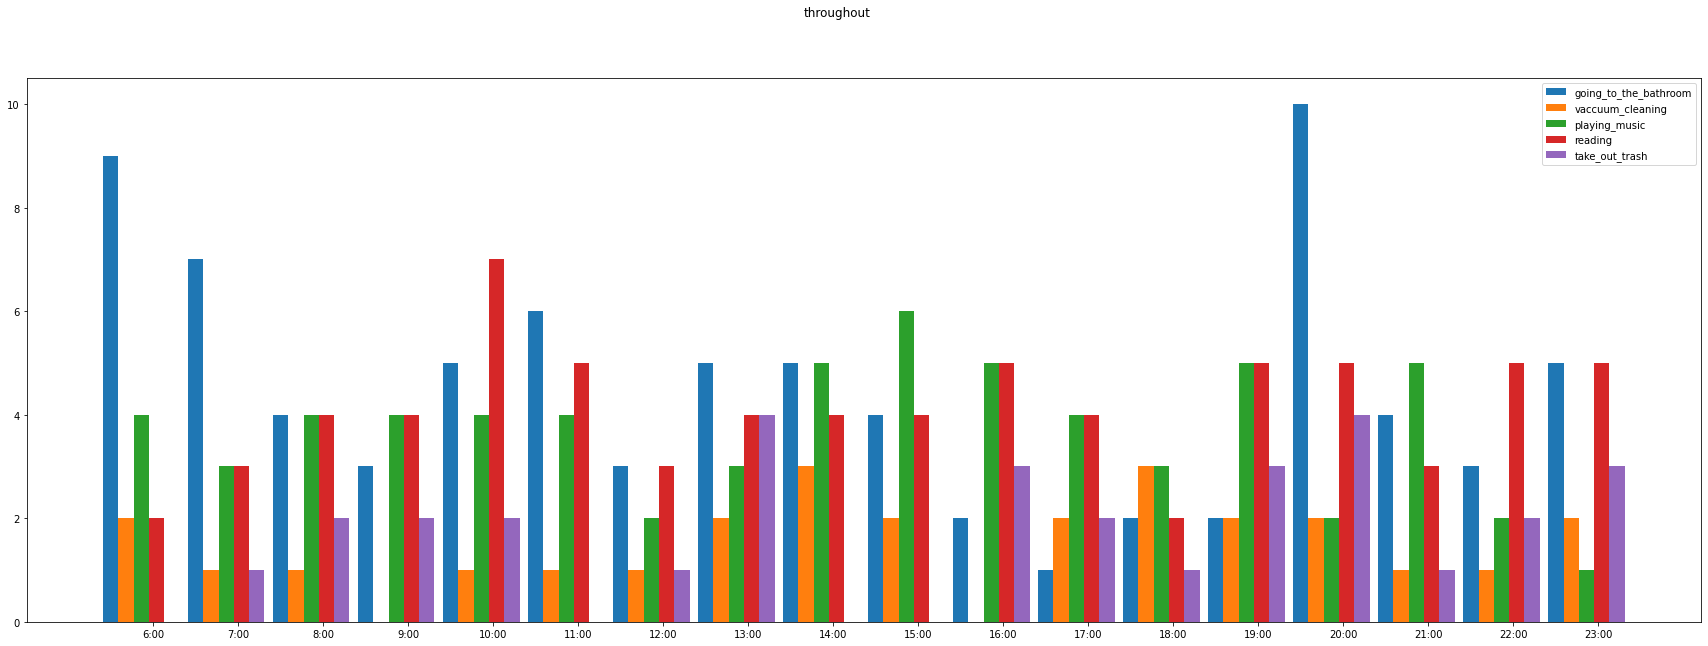

In [102]:
sampler = ScheduleSampler(filter_num=filter_num, idle_sampling_factor=idle_sampling_factor)

groups = {}
groups['morning'] = ['getting_out_of_bed', 'brushing_teeth', 'showering', 'breakfast', 'getting_dressed']
groups['daytime'] = ['computer_work', 'lunch']
groups['evening'] = ['leaving_home_and_coming_back', 'watching_tv', 'listening_to_music', 'dinner', 'socializing', 'sleeping']
groups['morning/evening'] = ['taking_medication', 'laundry', 'cleaning', 'kitchen_cleaning', 'wash_dishes']
groups['throughout'] = ['going_to_the_bathroom', 'vaccuum_cleaning', 'playing_music', 'reading', 'take_out_trash']

clrs = sns.color_palette()

gap = 0.1
for name,group in groups.items():
    fig, ax = plt.subplots()
    fig.set_size_inches(30, 10)
    num_act = len(group)
    width = (1 - gap)/num_act
    for i, act in enumerate(group):
        freq = sampler.activity_histograms[act]
        start_points = [f-0.5+i*width for f in freq.keys()]
        ax.bar(start_points, [max(0, f-filter_num) for f in freq.values()], label=act, width=width, color=clrs[i])
        # ax.plot(freq.keys(), [max(0, f-filter_num) for f in freq.values()], label=act, color=clrs[i])
    ax.set_xticks(start_times)
    ax.set_xticklabels([str(s)+':00' for s in start_times])
    fig.suptitle(name)
    plt.legend()
    plt.show()

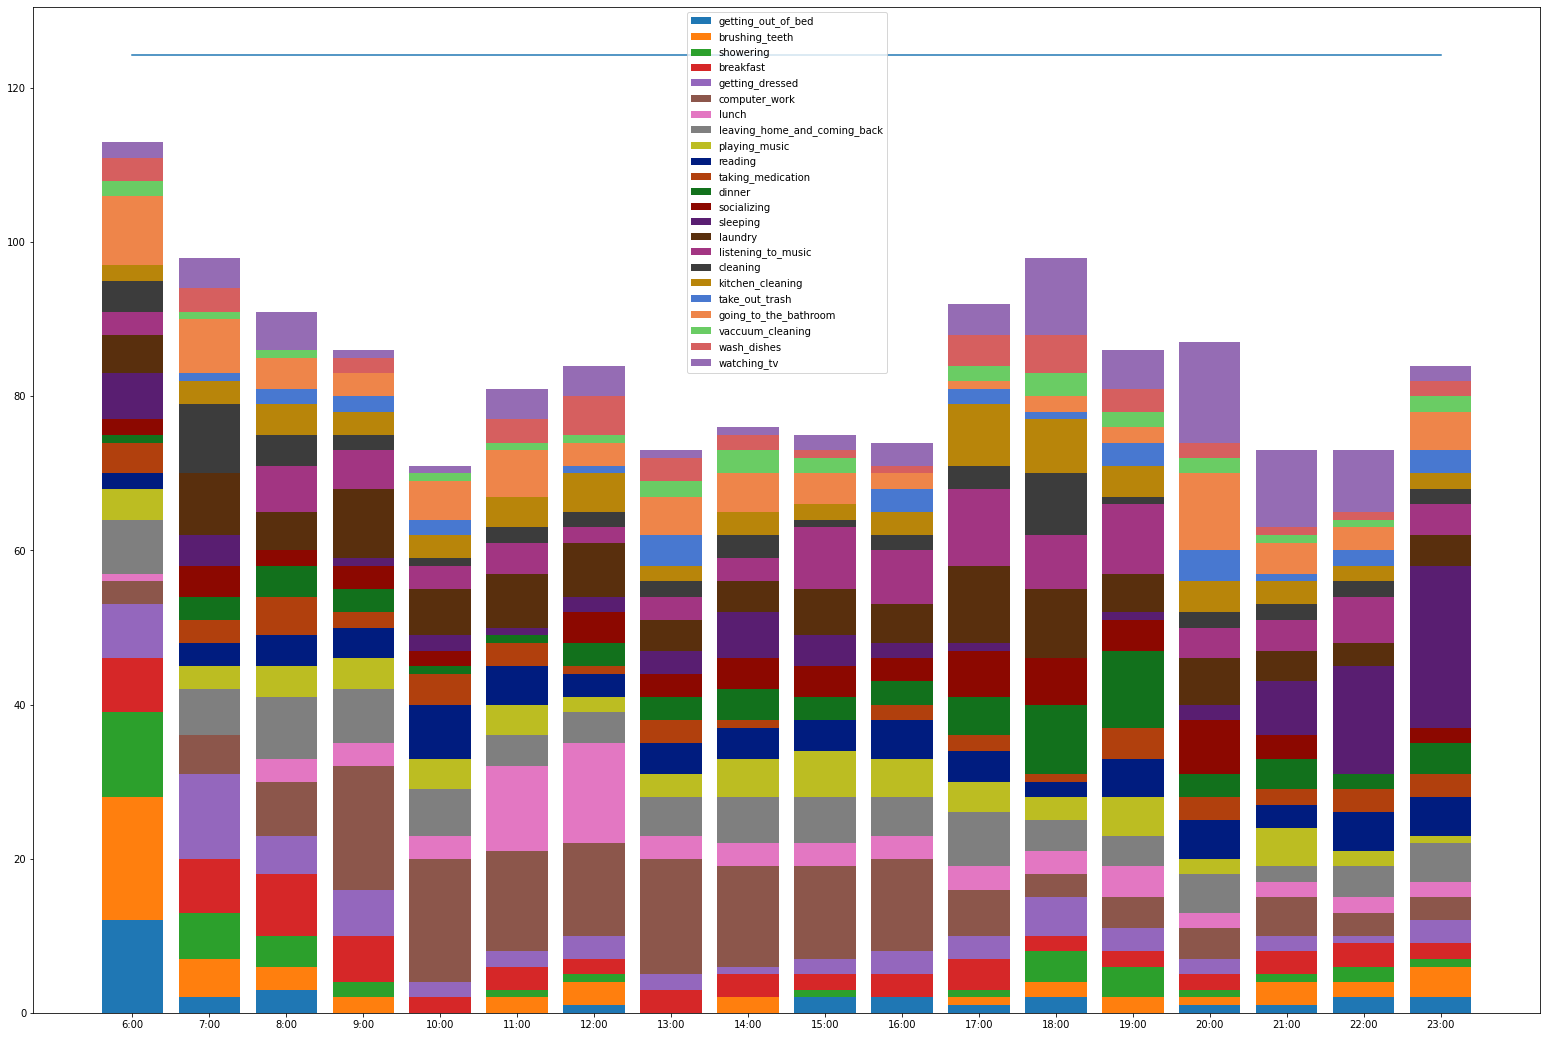

In [99]:
sampler = ScheduleSampler(filter_num=filter_num, idle_sampling_factor=idle_sampling_factor)

clrs = sns.color_palette()[:-1]+sns.color_palette("dark")[:-1]+sns.color_palette("muted")[:-1]
fig, ax = plt.subplots()
fig.set_size_inches(27, 18.5)
i=0
for act, freq in sampler.activity_histograms.items():
    if act is None:
        continue
    d = [sampler.activity_threshold[st][act][1] - sampler.activity_threshold[st][act][0] for st in start_times]
    ax.bar(freq.keys(), d, label=act, bottom=[sampler.activity_threshold[st][act][0] for st in start_times], color=clrs[i])
    i += 1
ax.plot([start_times[0], start_times[-1]], [sampler.sampling_range,sampler.sampling_range])
ax.set_xticks(start_times)
ax.set_xticklabels([str(s)+':00' for s in start_times])
plt.legend()
plt.show()

In [18]:
t = 7.5 * 60
print(sampler(t))


showering


In [68]:
print(sampler.sample_time_for('sleeping')/60)

6.016666666666667


In [60]:
print(sampler.sample_time_for('getting_out_of_bed')/60)


6.066666666666666
